#Домашнє завдання
##Частина 1
В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

Завантаження даних

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Перетворення даних у формат згодний для згорткової мережі

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Створення моделі

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Компіляція моделі

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Навчання моделі


In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 66s 138ms/step - loss: 0.7969 - accuracy: 0.7137 - val_loss: 0.4844 - val_accuracy: 0.8179
Epoch 2/10
469/469 [==============================] - 64s 137ms/step - loss: 0.4889 - accuracy: 0.8272 - val_loss: 0.3929 - val_accuracy: 0.8557
Epoch 3/10
469/469 [==============================] - 60s 127ms/step - loss: 0.4127 - accuracy: 0.8558 - val_loss: 0.3451 - val_accuracy: 0.8781
Epoch 4/10
469/469 [==============================] - 62s 133ms/step - loss: 0.3674 - accuracy: 0.8719 - val_loss: 0.3274 - val_accuracy: 0.8837
Epoch 5/10
469/469 [==============================] - 64s 137ms/step - loss: 0.3395 - accuracy: 0.8807 - val_loss: 0.3138 - val_accuracy: 0.8871
Epoch 6/10
469/469 [==============================] - 60s 127ms/step - loss: 0.3168 - accuracy: 0.8899 - val_loss: 0.2943 - val_accuracy: 0.8917
Epoch 7/10
469/469 [==============================] - 61s 130ms/step - loss: 0.2985 - accuracy: 0.8953 - val_loss: 0.2858 - val_ac

Оцінка точності на тестових даних

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2674 - accuracy: 0.9037


In [ ]:
print('Accuracy:', accuracy)

Accuracy: 0.9036999940872192


## Висновок
Згорткова мережа досягла точності приблизно 0.9037, тоді як багатошарова мережа з попереднього завдання мала точність 0.8938. За результатами експерименту можна зробити такі висновки:

1. Згорткова мережа показала кращі результати в порівнянні з багатошаровою мережею для класифікації даних Fashion MNIST.
2. Використання згорткових шарів дозволяє моделі ефективніше виявляти локальні залежності в зображеннях та розпізнавати важливі ознаки.
3. Додавання шарів пулінгу допомагає зменшити розмір зображення та зберегти важливу інформацію.
4. Використання шарів з випадковим відключенням (dropout) допомагає уникнути перенавчання моделі та покращити її загальну універсальність.

Загалом, згорткова мережа показала кращу точність у порівнянні з багатошаровою мережею, що свідчить про ефективність використання згорткових шарів для задач класифікації зображень.

##Частина 2
В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [1]:
from IPython.display import display, Javascript
display(Javascript('''
 function ClickConnect(){
   console.log("Автоматичне з'єднання було активовано");
   document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''))

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers.core import Lambda, Dense, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import GlobalAveragePooling2D, Dropout, Convolution2D, MaxPooling2D, InputLayer, Resizing
from keras.applications.vgg16 import VGG16, preprocess_input

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_full_X, train_full_y), (test_X, test_y) = fashion_mnist.load_data()

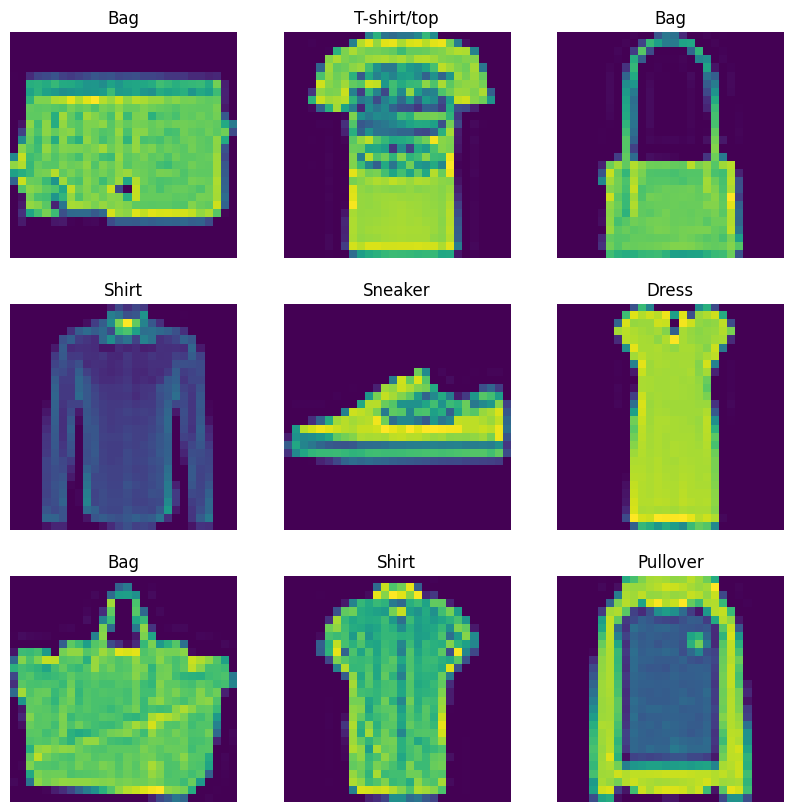

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    j = randint(0, 60000)
    plt.imshow(train_full_X[j,].astype("uint8"))
    plt.title(class_names[train_full_y[j,]])
    plt.axis("off")


In [6]:
train_full_X = train_full_X.reshape(train_full_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

In [7]:
train_full_X = np.repeat(train_full_X, 3, axis=3)
test_X = np.repeat(test_X, 3, axis=3)

In [8]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
batch_size = 128
num_epochs_per_iteration = 10
total_iterations = 4

In [10]:
for iteration in range(total_iterations):
    print(f"Iteration: {iteration+1}")

    # Розділення даних на частини
    train_X, _, train_y, _ = train_test_split(train_full_X, train_full_y, test_size=0.75/(iteration+1), random_state=42)

    # Створення моделі VGG16
    base = Sequential([
        InputLayer(input_shape=(28, 28, 3)),
        Resizing(224, 224, interpolation="bilinear"),
        vgg,
    ])

    # Витягнення ознак
    features = base.predict(preprocess_input(train_X))

    # Збереження витягнутих ознак
    np.save(f"features_iteration_{iteration+1}", features)

    # Завантаження витягнутих ознак для поточної ітерації
    features = np.load(f"features_iteration_{iteration+1}.npy")

    # Розділення на тренувальну та валідаційну вибірку
    train_X, val_X, train_y, val_y = train_test_split(features, train_y, test_size=0.10, random_state=42)

    # Створення моделі класифікатора
    model = Sequential([
        InputLayer(input_shape=(7, 7, 512)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax'),
    ])

    # Компіляція моделі
    optimizer = keras.optimizers.Adam(learning_rate=1e-6)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Навчання моделі
    history = model.fit(
        train_X, train_y,
        validation_data=(val_X, val_y),
        batch_size=batch_size,
        epochs=num_epochs_per_iteration,
        verbose=1
    )

    # Збереження навченої моделі
    model.save(f"model_iteration_{iteration+1}.h5")

Iteration: 1
469/469 [==============================] - 7761s 17s/step
Epoch 1/10
106/106 [==============================] - 11s 95ms/step - loss: 8.0970 - accuracy: 0.1504 - val_loss: 6.0052 - val_accuracy: 0.2107
Epoch 2/10
106/106 [==============================] - 7s 63ms/step - loss: 4.9235 - accuracy: 0.2710 - val_loss: 3.8472 - val_accuracy: 0.3513
Epoch 3/10
106/106 [==============================] - 7s 66ms/step - loss: 3.3011 - accuracy: 0.4161 - val_loss: 2.7627 - val_accuracy: 0.4833
Epoch 4/10
106/106 [==============================] - 7s 68ms/step - loss: 2.4849 - accuracy: 0.5224 - val_loss: 2.2048 - val_accuracy: 0.5680
Epoch 5/10
106/106 [==============================] - 6s 59ms/step - loss: 2.0246 - accuracy: 0.5939 - val_loss: 1.8690 - val_accuracy: 0.6120
Epoch 6/10
106/106 [==============================] - 7s 68ms/step - loss: 1.7317 - accuracy: 0.6426 - val_loss: 1.6446 - val_accuracy: 0.6600
Epoch 7/10
106/106 [==============================] - 6s 60ms/step - l

KeyboardInterrupt: ignored

In [ ]:
print('Accuracy:', accuracy)

Accuracy: 0.9036999940872192
